In [1]:
import numpy as np
from matplotlib import pyplot as plt
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)/rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None  if interp else 'none')

In [2]:
import cv2
from keras import models
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

CATEGORIES = ["bears", "deer", "lynx", "wolves"]

example_datagen = ImageDataGenerator(rescale=1)

example_generator = example_datagen.flow_from_directory(
        'TEST',
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')

Using TensorFlow backend.


Found 4 images belonging to 4 classes.


c:\users\josh\appdata\local\programs\python\python36\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


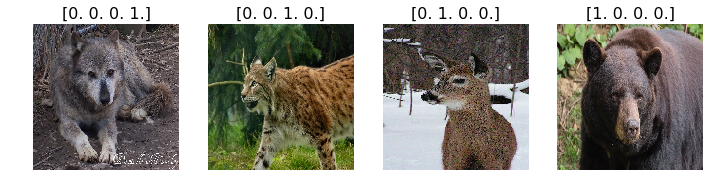

In [3]:
example_imgs, example_labels = next(example_generator)
plots(example_imgs, titles=example_labels)

In [4]:
test_dir = '/Users/Josh/DeepLearningData/fourAnimalClasses/test'

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=400,
        class_mode='categorical')

Found 400 images belonging to 4 classes.


In [6]:
test_imgs, test_labels = next(test_generator)


In [7]:
model = models.load_model("ForestAnimals5.h5")

In [8]:
predictions = model.predict_generator(test_generator, steps=1, verbose=1)

1/1 [==============================] - 12s 12s/step


In [9]:
correctpercent = np.mean(np.equal(np.argmax(test_labels, axis=-1), np.argmax(predictions, axis=-1)))

In [10]:
correctpercent

0.9125